In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns

function kdistance() - used to find the distance of a point with its kth nearest neighbour

In [2]:
def kdistance(k,pt,df):
    distance_from_all_points = []  # Store the values of distances between all sets of points 
    for y in df:
     distance_from_all_points.append(np.linalg.norm(pt-y))
    distance_from_all_points.sort()
    return distance_from_all_points[k+1]  # return kth smallest distance

function reachabilityDistance() - used to find reachability distance between 2 points, which is, min{dist(pt1,pt2),kdistance(pt2)}

In [3]:
def reachabilityDistance(pt1,pt2,k,df,kdist_val):
    dist = np.linalg.norm(pt2-pt1) # Euclidean distance between pt1 and pt2
    dist_k = kdist_val[tuple(pt2)] # k distance of pt2
    if(dist > dist_k):
        return dist
    else:
        return dist_k

function nearestNeighbours() - returns the k-nearest neighbours of a given point

In [4]:
def nearestNeighbours(k,pt,df):
    distance_from_all_points = []   # Store the values of distances between all sets of points
    for i in range(0,len(df)):
     distance_from_all_points.append(np.linalg.norm(pt-df[i]))
    sorted_indices = np.argsort(distance_from_all_points)
    ans = df[sorted_indices] # stores indices of points sorted in order of given point
    return ans[1:k+1]  # return indices of k nearest neighbours

function lrd() - calculates the locl reachability density of a given point

In [5]:
def lrd(pt,k,df,nn,kdist_val):
    s = 0 # Stores the value of reachability distance of pt
    for y in nn[tuple(pt)]:
        s = s + reachabilityDistance(pt,y,k,df,kdist_val)
    s = s/k
    if(s == 0):
        return -1
    else:
        return 1/s

function lof() - returns the lof value(outlier score) of a given point

In [6]:
def lof(pt,k,df,nn,kdist_val):
    s = 0 # Stores the value of lof of the point pt
    t = lrd(pt,k,df,nn,kdist_val)
    for y in nn[tuple(pt)]:
        s = s + (lrd(y,k,df,nn,kdist_val)/t)
    s = s/k   
    return s

Reading data from subset_selection_regions.xlsx

In [7]:
Z = pd.read_excel("~/DMFinalTerm_TeamID_05/data/subset_selection_regions.xlsx")

In [8]:
X = Z[Z['CAUSE'].isin(['Illness (Aids/STD)','Cancer','Paralysis','Insanity/Mental Illness','Other Prolonged Illness','Drug Abuse/Addiction','Bankruptcy or Sudden change in Economic Status','Suspected/Illicit Relation','Cancellation/Non-Settlement of Marriage','Death of Dear Person','Dowry Dispute','Divorce','Fall in Social Reputation','Family Problems','Love Affairs','Poverty','Professional/Career Problem','Property Dispute','Unemployment','Not having Children(Barrenness/Impotency)','Failure in Examination','Ideological Causes/Hero Worshipping','Illegitimate Pregnancy','Physical Abuse (Rape,Incest Etc.)','Causes Not known','Other Causes (Please Specity)'])]
Y = X.drop(['CAUSE','Index','Year','R1','R2','R3'],axis=1)

In [9]:
cols = Y.columns[1:]

Convert the dataset to a numpy array

In [10]:
x=Y['Male']
y=Y['Female']
d=Y[['Male','Female']]
e=np.array([[d.iloc[0][0],d.iloc[0][1]]])
for i in range(1,len(d)):
    e=np.append(e,[[d.iloc[i][0],d.iloc[i][1]]],axis=0)

e

array([[ 137,   38],
       [ 383,   40],
       [1655,  324],
       ...,
       [  38,    6],
       [  88,   43],
       [  48,    3]], dtype=int64)

Pre-computing kdistance for all points

In [11]:
kdist_val = {} # stores the value of k distance of all points
for y in e:
    kdist_val[tuple(y)] = kdistance(20,y,e)
kdist_val    

{(137, 38): 15.811388300841896,
 (383, 40): 56.586217403180434,
 (1655, 324): 375.2545802518605,
 (98, 45): 11.313708498984761,
 (132, 40): 14.866068747318506,
 (3, 4): 2.8284271247461903,
 (172, 57): 18.867962264113206,
 (448, 56): 69.72087205421343,
 (1467, 198): 345.44174617437307,
 (81, 6): 11.180339887498949,
 (100, 23): 9.433981132056603,
 (2, 3): 2.23606797749979,
 (164, 48): 19.235384061671343,
 (490, 36): 80.02499609497022,
 (1626, 226): 391.6490776192381,
 (108, 13): 13.341664064126334,
 (99, 23): 9.433981132056603,
 (13, 0): 5.0,
 (136, 39): 16.1245154965971,
 (519, 49): 90.24411338142782,
 (1834, 218): 532.7438408841532,
 (92, 25): 8.602325267042627,
 (93, 17): 9.0,
 (17, 6): 3.605551275463989,
 (106, 53): 13.038404810405298,
 (496, 67): 75.31268153505093,
 (1797, 214): 509.65969038172915,
 (141, 24): 20.8806130178211,
 (106, 16): 12.041594578792296,
 (30, 33): 8.54400374531753,
 (118, 37): 13.038404810405298,
 (881, 73): 222.3803048833237,
 (1718, 248): 440.3237445334966,


Pre-computing the k-nearest neighbours of all points

In [12]:
nn = {} # stores the k nearest neighbours of all points
for y in e:
    nn[tuple(y)] = nearestNeighbours(20,y,e)
nn[tuple(e[0])]    

array([[136,  39],
       [132,  40],
       [130,  36],
       [136,  46],
       [145,  42],
       [128,  40],
       [145,  33],
       [147,  37],
       [127,  39],
       [144,  30],
       [129,  30],
       [138,  50],
       [124,  37],
       [128,  48],
       [124,  43],
       [141,  24],
       [135,  53],
       [145,  51],
       [134,  53],
       [130,  52]], dtype=int64)

Calculation the outlie score(lof value) of all points

In [13]:
outlier_score = [] # stores the outlier score(lof value) of all points
for y in e:
    outlier_score.append(lof(y,20,e,nn,kdist_val))

In [14]:
outlier_score

[1.0293793170032743,
 1.0339133151352322,
 1.162096119289235,
 1.000346066711137,
 1.035343276226743,
 1.019266516071478,
 1.015480255638352,
 1.0228775770720233,
 1.1352301276133365,
 1.0654036617630984,
 0.9936729509855772,
 1.1551398166018063,
 0.9998056096201218,
 1.0239216732127414,
 1.1588199119927665,
 1.1027229932564766,
 0.9843272680593511,
 1.152475468223309,
 1.0264236762257215,
 1.0080877029501285,
 1.246652395097406,
 0.9750878919186959,
 0.9962561278205669,
 1.0199772236469917,
 1.0059599174635003,
 1.022372487732253,
 1.2194815538429737,
 1.1192402770080805,
 1.0639050098174532,
 1.060865653060384,
 0.9924768776240258,
 1.4238122925248942,
 1.1631487230465267,
 1.013424813804257,
 0.9825492336515623,
 1.0524357902828974,
 0.9936229910696823,
 1.520090138353088,
 1.1911979440395424,
 1.0832155936508832,
 1.0126434762071466,
 0.9778987509890629,
 1.0220287614404897,
 1.526134285313579,
 1.1567663796963148,
 0.9704885907526553,
 1.0808836787877327,
 1.1166244897168522,
 1.0

Appending the attribute 'Outlier' representing the outlier score to the dataframe

In [15]:
X['Outlier'] = outlier_score

C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
X

Index                                           CAUSE  Year  R1  R2  R3  \
0         0  Bankruptcy or Sudden change in Economic Status  2001   0   0   0   
1         0  Bankruptcy or Sudden change in Economic Status  2001   0   0   1   
2         0  Bankruptcy or Sudden change in Economic Status  2001   0   1   0   
3         0  Bankruptcy or Sudden change in Economic Status  2001   0   1   1   
4         0  Bankruptcy or Sudden change in Economic Status  2001   1   0   0   
...     ...                                             ...   ...  ..  ..  ..   
2731    455                                    Unemployment  2012   0   0   1   
2732    455                                    Unemployment  2012   0   1   0   
2733    455                                    Unemployment  2012   0   1   1   
2734    455                                    Unemployment  2012   1   0   0   
2735    455                                    Unemployment  2012   1   0   1   

      Male  Female   Outlier  
0      137      38  1.029379  
1      383      40  1.033913  
2     1655     324  1.162096  
3       98      45  1.000346  
4      132      40  1.035343  
...    ...     ...       ...  
2731   438      49  1.003992  
2732   512     107  1.027492  
2733    38       6  1.029828  
2734    88      43  1.038816  
2735    48       3  1.209710  

[1872 rows x 9 columns]

Scatter plot with x-axis representing number of males and y-axis representing number of females

In [17]:
fig = go.Figure(data=go.Scatter(x=X['Male'],
                                y=X['Female'],
                                mode='markers',
                                marker_color=X['Male'],
                                text=X['Outlier']))
fig.show()

Selecting the points with outlier score greater than the threshold value(1.75)

In [18]:
y = X[(X['Outlier'] > 1.75)]

In [19]:
y

Index                          CAUSE  Year  R1  R2  R3  Male  Female  \
219      36               Causes Not known  2001   0   1   1  2110    1753   
267      44               Causes Not known  2009   0   1   1  2894    1486   
273      45               Causes Not known  2010   0   1   1  3071    1681   
274      45               Causes Not known  2010   1   0   0  3015    1569   
279      46               Causes Not known  2011   0   1   1  3243    1862   
615     102                  Dowry Dispute  2007   0   1   1    12    1044   
627     104                  Dowry Dispute  2009   0   1   1    17     858   
633     105                  Dowry Dispute  2010   0   1   1    19     840   
634     105                  Dowry Dispute  2010   1   0   0     7     839   
639     106                  Dowry Dispute  2011   0   1   1     2     950   
902     150                Family Problems  2007   0   1   0  8785    4327   
920     153                Family Problems  2010   0   1   0  9433    4835   
926     154                Family Problems  2011   0   1   0  9339    4908   
932     155                Family Problems  2012   0   1   0  9476    4762   
1908    318  Other Causes (Please Specity)  2007   0   0   0  2518     896   
1932    322  Other Causes (Please Specity)  2011   0   0   0  2920    1035   

       Outlier  
219   1.809540  
267   2.241479  
273   2.373321  
274   2.526783  
279   1.860028  
615   2.567011  
627   1.821541  
633   1.755877  
634   1.751702  
639   2.165502  
902   1.830180  
920   2.181787  
926   2.156634  
932   2.187186  
1908  1.948049  
1932  2.534876

In [20]:
df = pd.read_excel('~/DMFinalTerm_TeamID_05/data/data_cleaning.xlsx')

Seleting points with 'CAUSE' as 'Dowry Dispute' in states of East India

In [21]:
p = df[(df['CAUSE'] == 'Dowry Dispute') & (df['STATE/UT'].isin(['BIHAR','JHARKHAND','ORISSA','WEST BENGAL','A & N ISLANDS']))]
p

Unnamed: 0       STATE/UT  Year          CAUSE  Male  Female  Total
166           190  A & N ISLANDS  2001  Dowry Dispute     0       0    0.0
192           218  A & N ISLANDS  2002  Dowry Dispute     0       0    0.0
218           246  A & N ISLANDS  2003  Dowry Dispute     0       0    0.0
244           274  A & N ISLANDS  2004  Dowry Dispute     0       0    0.0
270           302  A & N ISLANDS  2005  Dowry Dispute     0       0    0.0
296           330  A & N ISLANDS  2006  Dowry Dispute     0       0    0.0
322           358  A & N ISLANDS  2007  Dowry Dispute     0       0    0.0
348           386  A & N ISLANDS  2008  Dowry Dispute     0       0    0.0
374           414  A & N ISLANDS  2009  Dowry Dispute     0       0    0.0
400           442  A & N ISLANDS  2010  Dowry Dispute     0       0    0.0
426           470  A & N ISLANDS  2011  Dowry Dispute     0       0    0.0
452           498  A & N ISLANDS  2012  Dowry Dispute     0       0    0.0
2038         2254          BIHAR  2001  Dowry Dispute     1      16   17.0
2064         2282          BIHAR  2002  Dowry Dispute     1      21   22.0
2090         2310          BIHAR  2003  Dowry Dispute     1      29   30.0
2116         2338          BIHAR  2004  Dowry Dispute     2       7    9.0
2142         2366          BIHAR  2005  Dowry Dispute     7      10   17.0
2168         2394          BIHAR  2006  Dowry Dispute     1      28   29.0
2194         2422          BIHAR  2007  Dowry Dispute     7      19   26.0
2220         2450          BIHAR  2008  Dowry Dispute     0      26   26.0
2246         2478          BIHAR  2009  Dowry Dispute    16     119  135.0
2272         2506          BIHAR  2010  Dowry Dispute    18      53   71.0
2298         2534          BIHAR  2011  Dowry Dispute     0      18   18.0
2324         2562          BIHAR  2012  Dowry Dispute     2      13   15.0
7186         7930      JHARKHAND  2001  Dowry Dispute     0       0    0.0
7212         7958      JHARKHAND  2002  Dowry Dispute     0       0    0.0
7238         7986      JHARKHAND  2003  Dowry Dispute     0       0    0.0
7264         8014      JHARKHAND  2004  Dowry Dispute     0       2    2.0
7290         8042      JHARKHAND  2005  Dowry Dispute     0       8    8.0
7316         8070      JHARKHAND  2006  Dowry Dispute     0       8    8.0
7342         8098      JHARKHAND  2007  Dowry Dispute     5      26   31.0
7368         8126      JHARKHAND  2008  Dowry Dispute     2       3    5.0
7394         8154      JHARKHAND  2009  Dowry Dispute     1      13   14.0
7420         8182      JHARKHAND  2010  Dowry Dispute     1      20   21.0
7446         8210      JHARKHAND  2011  Dowry Dispute     2       2    4.0
7472         8238      JHARKHAND  2012  Dowry Dispute     0      19   19.0
16078       19282    WEST BENGAL  2001  Dowry Dispute     0     265  265.0
16104       19310    WEST BENGAL  2002  Dowry Dispute     0     286  286.0
16130       19338    WEST BENGAL  2003  Dowry Dispute     0     341  341.0
16156       19366    WEST BENGAL  2004  Dowry Dispute     0     411  411.0
16182       19394    WEST BENGAL  2005  Dowry Dispute     0     469  469.0
16208       19422    WEST BENGAL  2006  Dowry Dispute     0     445  445.0
16234       19450    WEST BENGAL  2007  Dowry Dispute     0     999  999.0
16260       19478    WEST BENGAL  2008  Dowry Dispute     1     761  762.0
16286       19506    WEST BENGAL  2009  Dowry Dispute     0     726  726.0
16312       19534    WEST BENGAL  2010  Dowry Dispute     0     767  767.0
16338       19562    WEST BENGAL  2011  Dowry Dispute     0     930  930.0
16364       19590    WEST BENGAL  2012  Dowry Dispute     0       0    0.0

Barplot of the number of female suicides due to dowry dispute in East India

In [22]:
c = p[p['STATE/UT'] == 'WEST BENGAL']['Female']
d = p[p['STATE/UT'] == 'BIHAR']['Female']
e = p[p['STATE/UT'] == 'JHARKHAND']['Female']
f = p[p['STATE/UT'] == 'A & N ISLANDS']['Female']

NameError: name 'b' is not defined

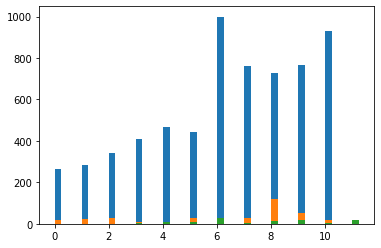

In [23]:
labels = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, c, width, label='WEST BENGAL')
rects2 = ax.bar(x + width/2, d, width, label='BIHAR')
rects3 = ax.bar(x + width/2, e, width, label='JHARKHAND')
rects4 = ax.bar(x + width/2, b, width, label='A & N ISLANDS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Female')
ax.set_title('Female suicides due to Dowry Dispute in states of East India')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Seleting points with 'CAUSE' as 'Dowry Dispute' in states of Central India

In [ ]:
q = df[(df['CAUSE'] == 'Dowry Dispute') & (df['STATE/UT'].isin(['CHHATTISGARH','MADHYA PRADESH']))]
q

Barplot of the number of female suicides due to dowry dispute in Central India

In [ ]:
a = q[q['STATE/UT'] == 'MADHYA PRADESH']['Female']
b = q[q['STATE/UT'] == 'CHHATTISGARH']['Female']

In [ ]:
labels = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, a, width, label='MADHYA PRADESH')
rects2 = ax.bar(x + width/2, b, width, label='CHHATTISGARH')


ax.set_ylabel('Female')
ax.set_title('Female suicides due to Dowry Dispute in states of Central India')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

Selecting points with 'CAUSE' as 'Family Problems' in states of South India

In [27]:
p2 = df[(df['CAUSE'] == 'Family Problems') & (df['STATE/UT'].isin(['ANDHRA PRADESH','KARNATAKA','KERALA','TAMIL NADU','LAKSHADWEEP','PUDUCHERRY']))]
p2

Unnamed: 0        STATE/UT  Year            CAUSE  Male  Female   Total
639           711  ANDHRA PRADESH  2001  Family Problems  1384     933  2317.0
665           739  ANDHRA PRADESH  2002  Family Problems  1478     816  2294.0
691           767  ANDHRA PRADESH  2003  Family Problems  1521     883  2404.0
717           795  ANDHRA PRADESH  2004  Family Problems  1672     905  2577.0
743           823  ANDHRA PRADESH  2005  Family Problems  1644     968  2612.0
...           ...             ...   ...              ...   ...     ...     ...
14393       15871      TAMIL NADU  2008  Family Problems  2334    1551  3885.0
14419       15899      TAMIL NADU  2009  Family Problems  2547    1716  4263.0
14445       15927      TAMIL NADU  2010  Family Problems  3522    2273  5795.0
14471       15955      TAMIL NADU  2011  Family Problems  3013    2038  5051.0
14497       15983      TAMIL NADU  2012  Family Problems  2774    2068  4842.0

[72 rows x 7 columns]

Barplots reprsenting the number of male and female suicides due to 'Family Problems' in the states of South India

In [28]:
a2 = p2[p2['STATE/UT'] == 'TAMIL NADU']['Male']
a3 = p2[p2['STATE/UT'] == 'ANDHRA PRADESH']['Male']
a4 = p2[p2['STATE/UT'] == 'KARNATAKA']['Male']
a5 = p2[p2['STATE/UT'] == 'KERALA']['Male']
b2 = p2[p2['STATE/UT'] == 'TAMIL NADU']['Female']
b3 = p2[p2['STATE/UT'] == 'ANDHRA PRADESH']['Female']
b4 = p2[p2['STATE/UT'] == 'KARNATAKA']['Female']
b5 = p2[p2['STATE/UT'] == 'KERALA']['Female']

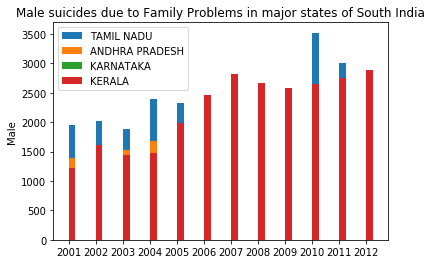

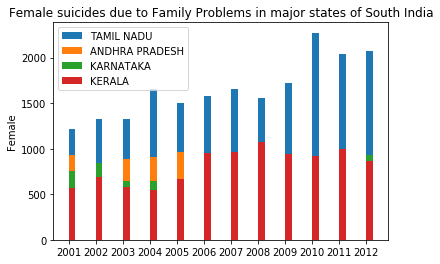

In [29]:
labels = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, a2, width, label='TAMIL NADU')
rects2 = ax.bar(x + width/2,a3, width, label='ANDHRA PRADESH')
rects3 = ax.bar(x + width/2, a4, width, label='KARNATAKA')
rects4 = ax.bar(x + width/2, a5, width, label='KERALA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Male')
ax.set_title('Male suicides due to Family Problems in major states of South India')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig, bx = plt.subplots()
brects1 = bx.bar(x + width/2, b2, width, label='TAMIL NADU')
brects2 = bx.bar(x + width/2,b3, width, label='ANDHRA PRADESH')
brects3 = bx.bar(x + width/2, b4, width, label='KARNATAKA')
brects4 = bx.bar(x + width/2, b5, width, label='KERALA')

# Add some text for labels, title and custom x-axis tick labels, etc.
bx.set_ylabel('Female')
bx.set_title('Female suicides due to Family Problems in major states of South India')
bx.set_xticks(x)
bx.set_xticklabels(labels)
bx.legend()

Selecting points with 'CAUSE' as 'Causes Not Known' in states of East India

In [30]:
p3 = df[(df['CAUSE'] == 'Causes Not known') & (df['STATE/UT'].isin(['BIHAR','JHARKHAND','ORISSA','WEST BENGAL','A & N ISLANDS']))]
p3

Unnamed: 0       STATE/UT  Year             CAUSE  Male  Female   Total
180           204  A & N ISLANDS  2001  Causes Not known    27      12    39.0
206           232  A & N ISLANDS  2002  Causes Not known    24      11    35.0
232           260  A & N ISLANDS  2003  Causes Not known    13       7    20.0
258           288  A & N ISLANDS  2004  Causes Not known    12       5    17.0
284           316  A & N ISLANDS  2005  Causes Not known    20       6    26.0
310           344  A & N ISLANDS  2006  Causes Not known     0       0     0.0
336           372  A & N ISLANDS  2007  Causes Not known     4       0     4.0
362           400  A & N ISLANDS  2008  Causes Not known    20       6    26.0
388           428  A & N ISLANDS  2009  Causes Not known    25       6    31.0
414           456  A & N ISLANDS  2010  Causes Not known    16       5    21.0
440           484  A & N ISLANDS  2011  Causes Not known    29      10    39.0
466           512  A & N ISLANDS  2012  Causes Not known    13       8    21.0
2052         2268          BIHAR  2001  Causes Not known    28      34    62.0
2078         2296          BIHAR  2002  Causes Not known    54      28    82.0
2104         2324          BIHAR  2003  Causes Not known    87      44   131.0
2130         2352          BIHAR  2004  Causes Not known    38      21    59.0
2156         2380          BIHAR  2005  Causes Not known    23      20    43.0
2182         2408          BIHAR  2006  Causes Not known    44      42    86.0
2208         2436          BIHAR  2007  Causes Not known    47      22    69.0
2234         2464          BIHAR  2008  Causes Not known   134      68   202.0
2260         2492          BIHAR  2009  Causes Not known    88      76   164.0
2286         2520          BIHAR  2010  Causes Not known    82      57   139.0
2312         2548          BIHAR  2011  Causes Not known    32      18    50.0
2338         2576          BIHAR  2012  Causes Not known   113      44   157.0
7200         7944      JHARKHAND  2001  Causes Not known    25      10    35.0
7226         7972      JHARKHAND  2002  Causes Not known    29      13    42.0
7252         8000      JHARKHAND  2003  Causes Not known    29      13    42.0
7278         8028      JHARKHAND  2004  Causes Not known    31      14    45.0
7304         8056      JHARKHAND  2005  Causes Not known    43      28    71.0
7330         8084      JHARKHAND  2006  Causes Not known    95      49   144.0
7356         8112      JHARKHAND  2007  Causes Not known   100      31   131.0
7382         8140      JHARKHAND  2008  Causes Not known   129      44   173.0
7408         8168      JHARKHAND  2009  Causes Not known    97      37   134.0
7434         8196      JHARKHAND  2010  Causes Not known   111      54   165.0
7460         8224      JHARKHAND  2011  Causes Not known    78      36   114.0
7486         8252      JHARKHAND  2012  Causes Not known   145      76   221.0
16092       19296    WEST BENGAL  2001  Causes Not known  2030    1697  3727.0
16118       19324    WEST BENGAL  2002  Causes Not known  2046    1513  3559.0
16144       19352    WEST BENGAL  2003  Causes Not known  1108     742  1850.0
16170       19380    WEST BENGAL  2004  Causes Not known  2086    1242  3328.0
16196       19408    WEST BENGAL  2005  Causes Not known  1769     984  2753.0
16222       19436    WEST BENGAL  2006  Causes Not known  1218     540  1758.0
16248       19464    WEST BENGAL  2007  Causes Not known  2208    1180  3388.0
16274       19492    WEST BENGAL  2008  Causes Not known  2163    1205  3368.0
16300       19520    WEST BENGAL  2009  Causes Not known  2684    1367  4051.0
16326       19548    WEST BENGAL  2010  Causes Not known  2862    1565  4427.0
16352       19576    WEST BENGAL  2011  Causes Not known  3104    1798  4902.0
16378       19604    WEST BENGAL  2012  Causes Not known     0       0     0.0

Barplots representing male and female suicides due to unknown causes in the states of East India

In [31]:
c2 = p3[p3['STATE/UT'] == 'WEST BENGAL']['Male']
c3 = p3[p3['STATE/UT'] == 'JHARKHAND']['Male']
c4 = p3[p3['STATE/UT'] == 'BIHAR']['Male']
c5 = p3[p3['STATE/UT'] == 'A & N ISLANDS']['Male']
d2 = p3[p3['STATE/UT'] == 'WEST BENGAL']['Female']
d3 = p3[p3['STATE/UT'] == 'JHARKHAND']['Female']
d4 = p3[p3['STATE/UT'] == 'BIHAR']['Female']
d5 = p3[p3['STATE/UT'] == 'A & N ISLANDS']['Female']

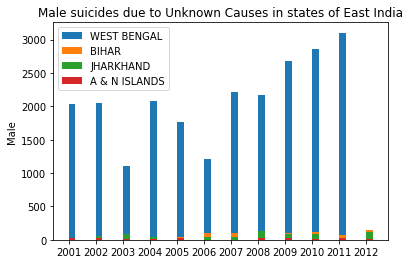

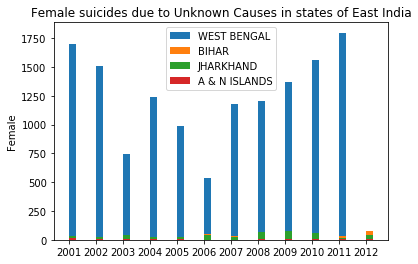

In [32]:
labels = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, c2, width, label='WEST BENGAL')
rects2 = ax.bar(x + width/2, c3, width, label='BIHAR')
rects3 = ax.bar(x + width/2, c4, width, label='JHARKHAND')
rects4 = ax.bar(x + width/2, c5, width, label='A & N ISLANDS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Male')
ax.set_title('Male suicides due to Unknown Causes in states of East India')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig, bx = plt.subplots()
brects1 = bx.bar(x + width/2, d2, width, label='WEST BENGAL')
brects2 = bx.bar(x + width/2, d3, width, label='BIHAR')
brects3 = bx.bar(x + width/2, d4, width, label='JHARKHAND')
brects4 = bx.bar(x + width/2, d5, width, label='A & N ISLANDS')

# Add some text for labels, title and custom x-axis tick labels, etc.
bx.set_ylabel('Female')
bx.set_title('Female suicides due to Unknown Causes in states of East India')
bx.set_xticks(x)
bx.set_xticklabels(labels)
bx.legend()
